In [1]:
#SELECT cb.limit_balance, pd.sex, pd.marital_status, pd.age, pi.pay_0, pi.pay_2, pi.pay_3, pi.pay_4, pi.pay_5, pi.pay_6,pi.pay_amt_1,pi.pay_amt_2,pi.pay_amt_3,pi.pay_amt_4,	pi.pay_amt_5,pi.pay_amt_6,bi.bill_amt_1, bi.bill_amt_2, bi.bill_amt_3, bi.bill_amt_4, bi.bill_amt_5, bi.bill_amt_6, ei.education_level, el.degree, dp.default_payment_next_month
#FROM `dev-rep-final-projects.credit_card_payments.card_limit` as cb
#LEFT JOIN `dev-rep-final-projects.credit_card_payments.personal_data` as pd
#ON cb.card_holder_id = pd.id
#LEFT JOIN `dev-rep-final-projects.credit_card_payments.payment_info` as pi
#ON cb.card_holder_id = pi.id
#LEFT JOIN `dev-rep-final-projects.credit_card_payments.default_payment_data` as dp
#ON cb.card_holder_id = dp.id
#LEFT JOIN `dev-rep-final-projects.credit_card_payments.bill_info` as bi
#ON cb.card_holder_id = bi.id
#LEFT JOIN `dev-rep-final-projects.credit_card_payments.education_info` as ei
#ON cb.card_holder_id = ei.id
#LEFT JOIN `dev-rep-final-projects.credit_card_payments.education_labels` as el
#ON ei.education_level = el.id
#ORDER BY cb.card_holder_id ASC

In [37]:
!pip install numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy import stats

%matplotlib inline
plt.style.use('bmh')


In [56]:
df = pd.read_csv('fin_data.csv')
df.head()

id  limit_balance  sex  marital_status  age  pay_0  pay_2  pay_3  pay_4  \
0   1          20000    2               1   24      2      2     -1     -1   
1   2         120000    2               2   26     -1      2      0      0   
2   3          90000    2               2   34      0      0      0      0   
3   4          50000    2               1   37      0      0      0      0   
4   5          50000    1               1   57     -1      0     -1      0   

   pay_5  ...  pay_amt_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0     -2  ...          0        3913        3102         689           0   
1      0  ...       2000        2682        1725        2682        3272   
2      0  ...       5000       29239       14027       13559       14331   
3      0  ...       1000       46990       48233       49291       28314   
4      0  ...        679        8617        5670       35835       20940   

   bill_amt_5  bill_amt_6  education_level      degree  \
0           0           0                2  university   
1        3455        3261                2  university   
2       14948       15549                2  university   
3       28959       29547                2  university   
4       19146       19131                2  university   

   default_payment_next_month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 26 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          30000 non-null  int64 
 1   limit_balance               30000 non-null  int64 
 2   sex                         30000 non-null  int64 
 3   marital_status              30000 non-null  int64 
 4   age                         30000 non-null  int64 
 5   pay_0                       30000 non-null  int64 
 6   pay_2                       30000 non-null  int64 
 7   pay_3                       30000 non-null  int64 
 8   pay_4                       30000 non-null  int64 
 9   pay_5                       30000 non-null  int64 
 10  pay_6                       30000 non-null  int64 
 11  pay_amt_1                   30000 non-null  int64 
 12  pay_amt_2                   30000 non-null  int64 
 13  pay_amt_3                   30000 non-null  in

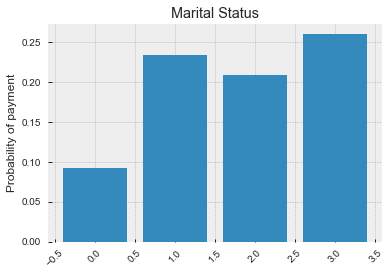

In [59]:
column = 'marital_status'
temp_df = df.groupby([column])['default_payment_next_month'].mean()
temp_df.sort_values(ascending=True, inplace=True)
temp_df = pd.DataFrame(temp_df)
temp_df.reset_index(inplace=True)
plt.bar(x=temp_df[column], height=temp_df['default_payment_next_month'])
plt.ylabel('Probability of payment')
plt.xticks(rotation=45)
plt.title('Marital Status')
plt.show()

In [26]:
# Categorical variables description
df[['sex', 'education_level', 'marital_status']].describe()

sex  education_level  marital_status
count  30000.000000     30000.000000    30000.000000
mean       1.603733         1.853133        1.551867
std        0.489129         0.790349        0.521970
min        1.000000         0.000000        0.000000
25%        1.000000         1.000000        1.000000
50%        2.000000         2.000000        2.000000
75%        2.000000         2.000000        2.000000
max        2.000000         6.000000        3.000000

In [6]:
#No missing data, but a few anomalous things:

#EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
#MARRIAGE has a label 0 that is undocumented


In [27]:
# Payment delay description
df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

pay_0  pay_2  pay_3  pay_4  pay_5  pay_6
0          2      2     -1     -1     -2     -2
1         -1      2      0      0      0      2
2          0      0      0      0      0      0
3          0      0      0      0      0      0
4         -1      0     -1      0      0      0
...      ...    ...    ...    ...    ...    ...
29995      0      0      0      0      0      0
29996     -1     -1     -1     -1      0      0
29997      4      3      2     -1      0      0
29998      1     -1      0      0      0     -1
29999      0      0      0      0      0      0

[30000 rows x 6 columns]

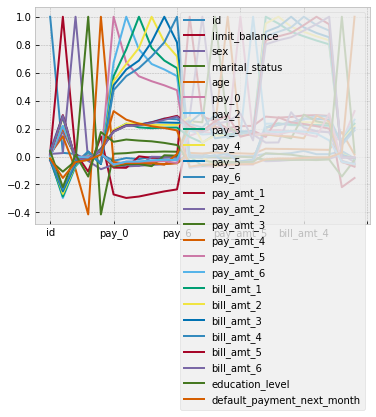

In [8]:
df.corr().plot()

In [28]:
df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].corr()

pay_0     pay_2     pay_3     pay_4     pay_5     pay_6
pay_0  1.000000  0.672164  0.574245  0.538841  0.509426  0.474553
pay_2  0.672164  1.000000  0.766552  0.662067  0.622780  0.575501
pay_3  0.574245  0.766552  1.000000  0.777359  0.686775  0.632684
pay_4  0.538841  0.662067  0.777359  1.000000  0.819835  0.716449
pay_5  0.509426  0.622780  0.686775  0.819835  1.000000  0.816900
pay_6  0.474553  0.575501  0.632684  0.716449  0.816900  1.000000

In [10]:
pip install -U ggplot

Requirement already up-to-date: ggplot in /Users/user/opt/anaconda3/lib/python3.7/site-packages (0.11.5)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import pandas_profiling
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy import stats
#from ggplot import *
%matplotlib inline


In [12]:
df.profile_report()

In [47]:
df.describe()

index            id   limit_balance           sex  \
count  30000.000000  30000.000000    30000.000000  30000.000000   
mean   14999.500000  15000.500000   167484.322667      1.603733   
std     8660.398374   8660.398374   129747.661567      0.489129   
min        0.000000      1.000000    10000.000000      1.000000   
25%     7499.750000   7500.750000    50000.000000      1.000000   
50%    14999.500000  15000.500000   140000.000000      2.000000   
75%    22499.250000  22500.250000   240000.000000      2.000000   
max    29999.000000  30000.000000  1000000.000000      2.000000   

       marital_status           age         pay_0         pay_2         pay_3  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean         1.551867     35.485500     -0.016700     -0.133767     -0.166200   
std          0.521970      9.217904      1.123802      1.197186      1.196868   
min          0.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%          1.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%          2.000000     34.000000      0.000000      0.000000      0.000000   
75%          2.000000     41.000000      0.000000      0.000000      0.000000   
max          3.000000     79.000000      8.000000      8.000000      8.000000   

              pay_4  ...      pay_amt_5      pay_amt_6     bill_amt_1  \
count  30000.000000  ...   30000.000000   30000.000000   30000.000000   
mean      -0.220667  ...    4799.387633    5215.502567   51223.330900   
std        1.169139  ...   15278.305679   17777.465775   73635.860576   
min       -2.000000  ...       0.000000       0.000000 -165580.000000   
25%       -1.000000  ...     252.500000     117.750000    3558.750000   
50%        0.000000  ...    1500.000000    1500.000000   22381.500000   
75%        0.000000  ...    4031.500000    4000.000000   67091.000000   
max        8.000000  ...  426529.000000  528666.000000  964511.000000   

          bill_amt_2    bill_amt_3     bill_amt_4     bill_amt_5  \
count   30000.000000  3.000000e+04   30000.000000   30000.000000   
mean    49179.075167  4.701315e+04   43262.948967   40311.400967   
std     71173.768783  6.934939e+04   64332.856134   60797.155770   
min    -69777.000000 -1.572640e+05 -170000.000000  -81334.000000   
25%      2984.750000  2.666250e+03    2326.750000    1763.000000   
50%     21200.000000  2.008850e+04   19052.000000   18104.500000   
75%     64006.250000  6.016475e+04   54506.000000   50190.500000   
max    983931.000000  1.664089e+06  891586.000000  927171.000000   

          bill_amt_6  education_level  default_payment_next_month  
count   30000.000000     30000.000000                30000.000000  
mean    38871.760400         1.853133                    0.221200  
std     59554.107537         0.790349                    0.415062  
min   -339603.000000         0.000000                    0.000000  
25%      1256.000000         1.000000                    0.000000  
50%     17071.000000         2.000000                    0.000000  
75%     49198.250000         2.000000                    0.000000  
max    961664.000000         6.000000                    1.000000  

[8 rows x 26 columns]

In [14]:
#There are 30,000 distinct credit card clients.

#The average value for the amount of credit card limit is 167,484. 
#The standard deviation is unusually large, max value being 1M.

#Education level is mostly graduate school and university.

#Most of the clients are either marrined or single (less frequent the other status).

#Average age is 35.5 years, with a standard deviation of 9.2.

#As the value 0 for default payment means 'not default' and value 1 means 'default', 
#the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month 
#(will verify this in the next sections of this analysis).

In [15]:
#Missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

degree  default_payment_next_month  limit_balance  sex  \
Total    14.000000                         0.0            0.0  0.0   
Percent   0.046667                         0.0            0.0  0.0   

         marital_status  age  pay_0  pay_2  pay_3  pay_4  ...  pay_amt_5  \
Total               0.0  0.0    0.0    0.0    0.0    0.0  ...        0.0   
Percent             0.0  0.0    0.0    0.0    0.0    0.0  ...        0.0   

         pay_amt_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
Total          0.0         0.0         0.0         0.0         0.0   
Percent        0.0         0.0         0.0         0.0         0.0   

         bill_amt_5  bill_amt_6  education_level   id  
Total           0.0         0.0              0.0  0.0  
Percent         0.0         0.0              0.0  0.0  

[2 rows x 26 columns]

In [30]:
# Categorical variables description
df[['sex', 'education_level', 'marital_status']].describe()

sex  education_level  marital_status
count  30000.000000     30000.000000    30000.000000
mean       1.603733         1.853133        1.551867
std        0.489129         0.790349        0.521970
min        1.000000         0.000000        0.000000
25%        1.000000         1.000000        1.000000
50%        2.000000         2.000000        2.000000
75%        2.000000         2.000000        2.000000
max        2.000000         6.000000        3.000000

In [17]:
df.corr().style.background_gradient('coolwarm')

In [ ]:
#Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). 
#Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

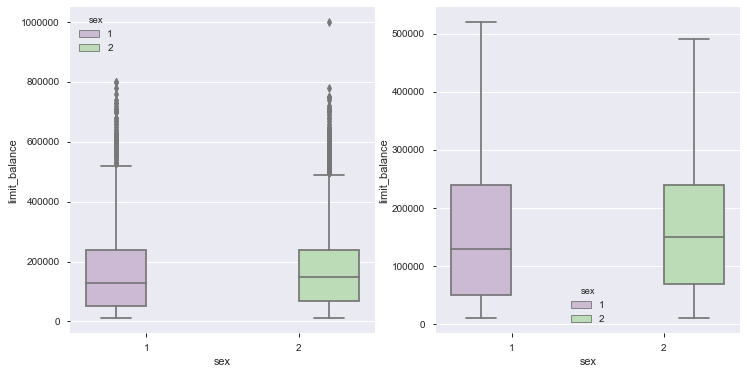

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="sex", y="limit_balance", hue="sex",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="sex", y="limit_balance", hue="sex",data=df, palette="PRGn",showfliers=False)
plt.show();

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   index                       30000 non-null  int64 
 1   id                          30000 non-null  int64 
 2   limit_balance               30000 non-null  int64 
 3   sex                         30000 non-null  int64 
 4   marital_status              30000 non-null  int64 
 5   age                         30000 non-null  int64 
 6   pay_0                       30000 non-null  int64 
 7   pay_2                       30000 non-null  int64 
 8   pay_3                       30000 non-null  int64 
 9   pay_4                       30000 non-null  int64 
 10  pay_5                       30000 non-null  int64 
 11  pay_6                       30000 non-null  int64 
 12  pay_amt_1                   30000 non-null  int64 
 13  pay_amt_2                   30000 non-null  in

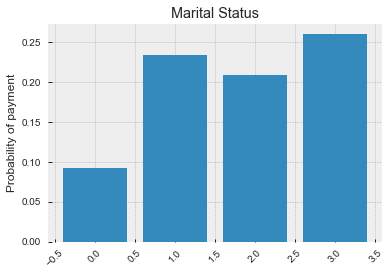

In [60]:
column = 'marital_status'
temp_df = df.groupby([column])['default_payment_next_month'].mean()
temp_df.sort_values(ascending=True, inplace=True)
temp_df = pd.DataFrame(temp_df)
temp_df.reset_index(inplace=True)
plt.bar(x=temp_df[column], height=temp_df['default_payment_next_month'])
plt.ylabel('Probability of payment')
plt.xticks(rotation=45)
plt.title('Marital Status')
plt.show()

In [198]:
df.head()

index  id  limit_balance  sex  marital_status  age  pay_0  pay_2  pay_3  \
0      0   1          20000    2               1   24      2      2     -1   
1      1   2         120000    2               2   26     -1      2      0   
2      2   3          90000    2               2   34      0      0      0   
3      3   4          50000    2               1   37      0      0      0   
4      4   5          50000    1               1   57     -1      0     -1   

   pay_4  ...  pay_amt_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0     -1  ...          0        3913        3102         689           0   
1      0  ...       2000        2682        1725        2682        3272   
2      0  ...       5000       29239       14027       13559       14331   
3      0  ...       1000       46990       48233       49291       28314   
4      0  ...        679        8617        5670       35835       20940   

   bill_amt_5  bill_amt_6  education_level      degree  \
0           0           0                2  university   
1        3455        3261                2  university   
2       14948       15549                2  university   
3       28959       29547                2  university   
4       19146       19131                2  university   

   default_payment_next_month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 27 columns]

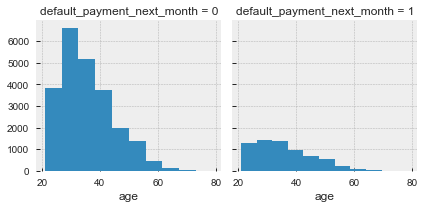

In [201]:
g = sns.FacetGrid(df, col = 'default_payment_next_month')
g.map(plt.hist, 'age')

In [215]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [219]:
df['SE_MA'] = 0
df.loc[((df.sex == 1) & (df.marital_status == 1)) , 'SE_MA'] = 1 #married man
df.loc[((df.sex == 1) & (df.marital_status == 2)) , 'SE_MA'] = 2 #single man
df.loc[((df.sex == 1) & (df.marital_status == 3)) , 'SE_MA'] = 3 #divorced man
df.loc[((df.sex == 2) & (df.marital_status == 1)) , 'SE_MA'] = 4 #married woman
df.loc[((df.sex == 2) & (df.marital_status== 2)) , 'SE_MA'] = 5 #single woman
df.loc[((df.sex == 2) & (df.marital_status == 3)) , 'SE_MA'] = 6 #divorced woman
corr_2_cols('SE_MA', 'default_payment_next_month')

default_payment_next_month     0     1      perc
SE_MA                                           
0                             49     5  0.092593
1                           3844  1346  0.259345
2                           5068  1485  0.226614
3                             91    40  0.305344
4                           6609  1860  0.219625
5                           7555  1856  0.197216
6                            148    44  0.229167

In [ ]:
#As we can see married men have a higher probability of defaulting, 
#single men have nothing special 
#with respect to the all population and single women have a lowe probability of defaulting. Among the divorced, men have more troubles (but these categories are not very much populated).

#It can be useful to create age categories.
#We can do it in three ways (that I know of).

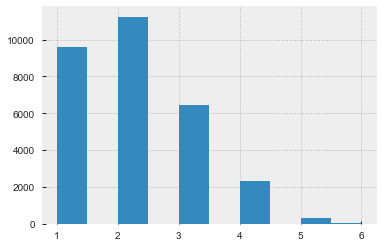

In [221]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['age'] > 20) & (df['age'] < 30)) , 'AgeBin'] = 1
df.loc[((df['age'] >= 30) & (df['age'] < 40)) , 'AgeBin'] = 2
df.loc[((df['age'] >= 40) & (df['age'] < 50)) , 'AgeBin'] = 3
df.loc[((df['age'] >= 50) & (df['age'] < 60)) , 'AgeBin'] = 4
df.loc[((df['age'] >= 60) & (df['age'] < 70)) , 'AgeBin'] = 5
df.loc[((df['age'] >= 70) & (df['age'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

In [222]:
df['AgeBin3'] = pd.cut(df['age'], 6)
df.AgeBin3.value_counts()

(20.942, 30.667]    11013
(30.667, 40.333]    10713
(40.333, 50.0]       6005
(50.0, 59.667]       1930
(59.667, 69.333]      314
(69.333, 79.0]         25
Name: AgeBin3, dtype: int64

In [223]:
corr_2_cols('AgeBin', 'default_payment_next_month') #which Illustrating "age" and "default" correlation,
#means that 2d binned age group (betwen 30-40 years old) has the highiest number of default clients:

default_payment_next_month     0     1      perc
AgeBin                                          
1                           7421  2197  0.228426
2                           8962  2276  0.202527
3                           4979  1485  0.229734
4                           1759   582  0.248612
5                            225    89  0.283439
6                             18     7  0.280000

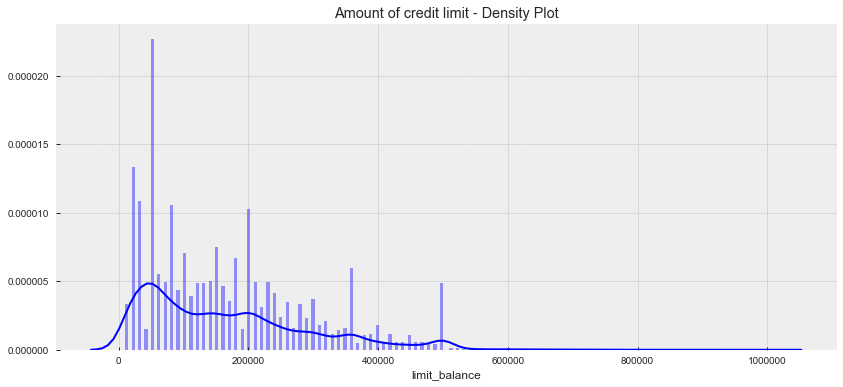

In [68]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['limit_balance'],kde=True,bins=200, color="blue")
plt.show()

In [98]:
from sklearn import tree
from sklearn.tree import _tree

import matplotlib.pyplot as plt


from IPython.display import clear_output, Image
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting


np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [106]:
from sklearn import tree
from sklearn.tree import _tree

import matplotlib.pyplot as plt


from IPython.display import clear_output, Image
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [79]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True )

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['degree', 'default_payment_next_month'], axis=1), 
                                                    df['default_payment_next_month'], test_size=0.2, random_state=42)

In [90]:
rf_model = RandomForestClassifier(oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_train, y_train), rf_model.score(X_test, y_test), rf_model.oob_score_

(0.9999583333333333, 0.8161666666666667, 0.8164583333333333)

In [91]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [108]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [113]:
df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [119]:
df.drop('level_0',axis=1, inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   index                       30000 non-null  int64 
 1   id                          30000 non-null  int64 
 2   limit_balance               30000 non-null  int64 
 3   sex                         30000 non-null  int64 
 4   marital_status              30000 non-null  int64 
 5   age                         30000 non-null  int64 
 6   pay_0                       30000 non-null  int64 
 7   pay_2                       30000 non-null  int64 
 8   pay_3                       30000 non-null  int64 
 9   pay_4                       30000 non-null  int64 
 10  pay_5                       30000 non-null  int64 
 11  pay_6                       30000 non-null  int64 
 12  pay_amt_1                   30000 non-null  int64 
 13  pay_amt_2                   30000 non-null  in

In [128]:
target = 'default_payment_next_month'
predictors = ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 
                'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
                'bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


In [123]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True )

In [124]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

In [126]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=42,
                             
                             n_estimators=100,
                             verbose=False)

In [129]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=42, verbose=False,
                       warm_start=False)

In [130]:
preds = clf.predict(val_df[predictors])

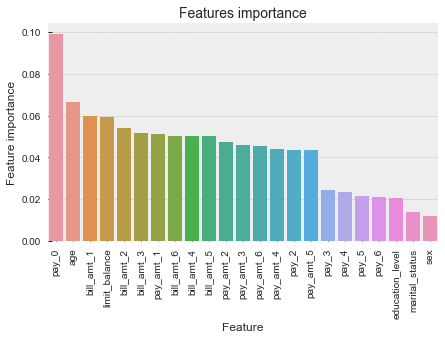

In [131]:
#Let's also visualize the features importance.
#Features importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


In [ ]:
#The most important features are PAY_0, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3.

In [ ]:
#Confusion matrix

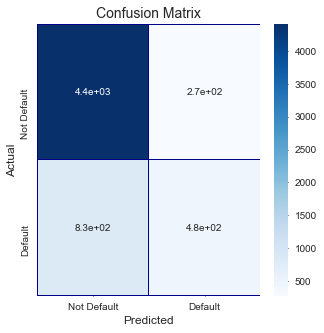

In [132]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [158]:
cm

Predicted     0    1
Actual              
0          4413  274
1           830  483

In [133]:
roc_auc_score(val_df[target].values, preds)

0.6547001469443363

In [134]:
cat_features = ['education_level', 'sex', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [135]:
train_f_df = pd.get_dummies(train_df_bkp, columns = cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns = cat_features)

In [136]:
print("Default of Credit Card Clients train data -  rows:",train_f_df.shape[0]," columns:", train_f_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_f_df.shape[0]," columns:", val_f_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 95
Default of Credit Card Clients val  data -  rows: 6000  columns: 89


In [139]:
pip install catboost

     |████████████████████████████████| 10.7 MB 9.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [149]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from catboost import CatBoostRegressor

from catboost import Pool, CatBoostClassifier, cv

In [153]:

clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                           
                             od_wait=100)

In [154]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 604ms	remaining: 5m 1s
1:	total: 962ms	remaining: 3m 59s
2:	total: 1.3s	remaining: 3m 35s
3:	total: 1.64s	remaining: 3m 23s
4:	total: 1.96s	remaining: 3m 14s
5:	total: 2.3s	remaining: 3m 9s
6:	total: 2.65s	remaining: 3m 6s
7:	total: 3s	remaining: 3m 4s
8:	total: 3.32s	remaining: 3m 1s
9:	total: 3.65s	remaining: 2m 58s
10:	total: 3.98s	remaining: 2m 56s
11:	total: 4.3s	remaining: 2m 54s
12:	total: 4.64s	remaining: 2m 53s
13:	total: 4.96s	remaining: 2m 52s
14:	total: 5.07s	remaining: 2m 43s
15:	total: 5.4s	remaining: 2m 43s
16:	total: 5.74s	remaining: 2m 43s
17:	total: 5.76s	remaining: 2m 34s
18:	total: 6.1s	remaining: 2m 34s
19:	total: 6.16s	remaining: 2m 27s
20:	total: 6.49s	remaining: 2m 28s
21:	total: 6.83s	remaining: 2m 28s
22:	total: 6.9s	remaining: 2m 23s
23:	total: 7.23s	remaining: 2m 23s
24:	total: 7.55s	remaining: 2m 23s
25:	total: 7.89s	remaining: 2m 23s
26:	total: 8.23s	remaining: 2m 24s
27:	total: 8.55s	remaining: 2m 24s
28:	total: 8.89s	remaining: 2m 24s
29:	total

233:	total: 1m 19s	remaining: 1m 30s
234:	total: 1m 20s	remaining: 1m 30s
235:	total: 1m 20s	remaining: 1m 30s
236:	total: 1m 20s	remaining: 1m 29s
237:	total: 1m 21s	remaining: 1m 29s
238:	total: 1m 21s	remaining: 1m 29s
239:	total: 1m 21s	remaining: 1m 28s
240:	total: 1m 22s	remaining: 1m 28s
241:	total: 1m 22s	remaining: 1m 28s
242:	total: 1m 23s	remaining: 1m 27s
243:	total: 1m 23s	remaining: 1m 27s
244:	total: 1m 23s	remaining: 1m 27s
245:	total: 1m 24s	remaining: 1m 26s
246:	total: 1m 24s	remaining: 1m 26s
247:	total: 1m 24s	remaining: 1m 26s
248:	total: 1m 25s	remaining: 1m 25s
249:	total: 1m 25s	remaining: 1m 25s
250:	total: 1m 25s	remaining: 1m 25s
251:	total: 1m 26s	remaining: 1m 24s
252:	total: 1m 26s	remaining: 1m 24s
253:	total: 1m 26s	remaining: 1m 24s
254:	total: 1m 27s	remaining: 1m 23s
255:	total: 1m 27s	remaining: 1m 23s
256:	total: 1m 27s	remaining: 1m 23s
257:	total: 1m 28s	remaining: 1m 22s
258:	total: 1m 28s	remaining: 1m 22s
259:	total: 1m 28s	remaining: 1m 22s
2

461:	total: 2m 40s	remaining: 13.2s
462:	total: 2m 40s	remaining: 12.8s
463:	total: 2m 40s	remaining: 12.5s
464:	total: 2m 41s	remaining: 12.1s
465:	total: 2m 41s	remaining: 11.8s
466:	total: 2m 41s	remaining: 11.4s
467:	total: 2m 42s	remaining: 11.1s
468:	total: 2m 42s	remaining: 10.8s
469:	total: 2m 43s	remaining: 10.4s
470:	total: 2m 43s	remaining: 10.1s
471:	total: 2m 43s	remaining: 9.71s
472:	total: 2m 44s	remaining: 9.37s
473:	total: 2m 44s	remaining: 9.02s
474:	total: 2m 44s	remaining: 8.67s
475:	total: 2m 45s	remaining: 8.33s
476:	total: 2m 45s	remaining: 7.98s
477:	total: 2m 45s	remaining: 7.63s
478:	total: 2m 46s	remaining: 7.29s
479:	total: 2m 46s	remaining: 6.94s
480:	total: 2m 46s	remaining: 6.59s
481:	total: 2m 47s	remaining: 6.24s
482:	total: 2m 47s	remaining: 5.9s
483:	total: 2m 47s	remaining: 5.55s
484:	total: 2m 48s	remaining: 5.2s
485:	total: 2m 48s	remaining: 4.86s
486:	total: 2m 48s	remaining: 4.51s
487:	total: 2m 49s	remaining: 4.16s
488:	total: 2m 49s	remaining: 

In [155]:
preds = clf.predict(val_df[predictors])

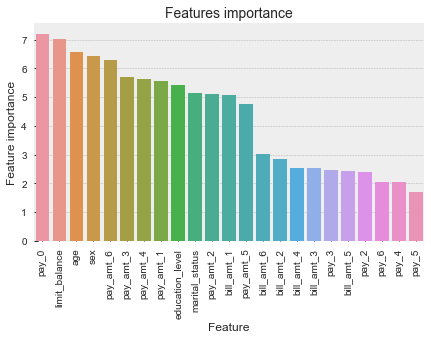

In [156]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [159]:
from sklearn.model_selection import GridSearchCV

In [161]:
params = {'max_depth':[3,7,10],
         'criterion': ['gini','entropy'],
         'max_leaf_nodes': [5,10,15]}
model = tree.DecisionTreeClassifier()

In [162]:
GS_model = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    verbose=1)
GS_model.fit(X_test,y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    4.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [163]:
GS_model.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 10}

In [164]:
GS_model.best_score_

0.8210000000000001

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('default_payment_next_month', axis=1),
    df['default_payment_next_month'],
    test_size=0.2,
    random_state=42)

In [170]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold

In [177]:
df.head()

index  id  limit_balance  sex  marital_status  age  pay_0  pay_2  pay_3  \
0      0   1          20000    2               1   24      2      2     -1   
1      1   2         120000    2               2   26     -1      2      0   
2      2   3          90000    2               2   34      0      0      0   
3      3   4          50000    2               1   37      0      0      0   
4      4   5          50000    1               1   57     -1      0     -1   

   pay_4  ...  pay_amt_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0     -1  ...          0        3913        3102         689           0   
1      0  ...       2000        2682        1725        2682        3272   
2      0  ...       5000       29239       14027       13559       14331   
3      0  ...       1000       46990       48233       49291       28314   
4      0  ...        679        8617        5670       35835       20940   

   bill_amt_5  bill_amt_6  education_level      degree  \
0           0           0                2  university   
1        3455        3261                2  university   
2       14948       15549                2  university   
3       28959       29547                2  university   
4       19146       19131                2  university   

   default_payment_next_month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 27 columns]

In [180]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['degree', 'default_payment_next_month'], axis=1), 
                                                    df['default_payment_next_month'], test_size=0.2, random_state=42)

In [183]:
bagging_model = BaggingClassifier(
    #base_estimator=decision_tree,
    max_samples=0.5,
    n_estimators=100,
    oob_score=True,
    random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.5, n_estimators=100,
                  n_jobs=None, oob_score=True, random_state=42, verbose=0,
                  warm_start=False)

In [185]:
bagging_model.score(X_test, y_test)

0.8196666666666667